In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlxtend as mx
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from IPython.core import display as disp

In [2]:
data=pd.read_csv("Estudiantes.csv")#Leemos el fichero csv
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# 1. Haz el preprocesamiento necesario para generar el DataFrame de entrada donde las 3 columnas de puntuación estén categorizadas en 4 clases diferentes con rangos de 25 puntos. 

Entiendo que las 3 columnas de puntuacion hace referencia a las columnas de 'math score', 'reading score',
'writing score'.

In [3]:
columnas=data.columns #Guardamos los datos en un array para comprobar las columnas que tienen score en el nombre
columnas

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
#Comprobamos las columnas que tienen score en el nombre
variables=[]
for i in range(0,len(columnas)):
    if(columnas.str.contains('score')[i]):
        variables.append(columnas[i])
variables

['math score', 'reading score', 'writing score']

In [5]:
#Creacion de las sustituiciones que se realizan al categorizar los datos dependiendo de la variable
arraychoicelist=[[ 'baja_math', 'media_math','alta_math','muyalta_math'],
                [ 'baja_read', 'media_read','alta_read','muyalta_read'],
                [ 'baja_write', 'media_write','alta_write','muyalta_write']]

Categorizacion en 4 clases diferentes con rangos de 25 puntos.

In [6]:
#Utilizamos el idx para hacer referencia al array que contiene las sustituciones
for idx,var in enumerate(variables):
    conditionlist = [
        (data[var] >= 0) & (data[var] <=25),
        (data[var] > 25) & (data[var] <=50),
        (data[var] > 50) & (data[var] <=75),
        (data[var] > 75)]
    choicelist = arraychoicelist[idx]
    data[var] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,alta_math,alta_read,alta_write
1,female,group C,some college,standard,completed,alta_math,muyalta_read,muyalta_write
2,female,group B,master's degree,standard,none,muyalta_math,muyalta_read,muyalta_write
3,male,group A,associate's degree,free/reduced,none,media_math,alta_read,media_write
4,male,group C,some college,standard,none,muyalta_math,muyalta_read,alta_write
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,muyalta_math,muyalta_read,muyalta_write
996,male,group C,high school,free/reduced,none,alta_math,alta_read,alta_write
997,female,group C,high school,free/reduced,completed,alta_math,alta_read,alta_write
998,female,group D,some college,standard,completed,alta_math,muyalta_read,muyalta_write


In [7]:
data.isnull().sum()#Missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
#Funcion que pasando el dataframe lo transforma en transacciones
def transforma(dataframe):
    dataframe=np.array(dataframe)
    te = TransactionEncoder()
    te_ary = te.fit(dataframe).transform(dataframe)
    datafinal = pd.DataFrame(te_ary, columns=te.columns_)
    return datafinal

## 1.1 Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

Entiendo que cada tipo de puntuacion se refiere a la puntuacion de writing, reading y math.

La frecuencia al ser el soporte entre el numero de transacciones se cambia al cambiar el soporte.

In [9]:
#Creo un array donde se guardan los dataframes tras transformarlo en transacciones
arraydata=[]
for var in variables:
    arraydata.append(transforma(data[[var]]))

In [10]:
arraysoporte=[0.003,0.02,0.1]#Creacion de array que guarda los soportes que se utilizarán en cada puntuacion

In [11]:
#Funcion que pasando el array con las transacciones y el soporte lo calcula
def soporte(arraydataframes,soporte):
    for i in range(0,len(arraydataframes)):
        for j in range (0,len(arraydataframes)):
            print('Variable: ',variables[i].upper())
            print('soporte: ',soporte[j])
            aprio = apriori(arraydataframes[i],min_support=soporte[j],use_colnames=True)
            aprio['frecuencia']=aprio['support']*len(data.index)
            disp.display(aprio)
        

In [12]:
#Funcion que aplica apriori segun el dataframe y el soporte pasado
def funapriori(dataframe,soporte):
    aprio = apriori(dataframe,min_support=soporte,use_colnames=True)
    aprio['frecuencia']=aprio['support']*len(data.index)
    disp.display(aprio)
    return aprio

In [13]:
soporte(arraydata,arraysoporte)

Variable:  MATH SCORE
soporte:  0.003


,support,itemsets,frecuencia
0,0.576,(alta_math),576.0
1,0.007,(baja_math),7.0
2,0.143,(media_math),143.0
3,0.274,(muyalta_math),274.0


Variable:  MATH SCORE
soporte:  0.02


,support,itemsets,frecuencia
0,0.576,(alta_math),576.0
1,0.143,(media_math),143.0
2,0.274,(muyalta_math),274.0


Variable:  MATH SCORE
soporte:  0.1


,support,itemsets,frecuencia
0,0.576,(alta_math),576.0
1,0.143,(media_math),143.0
2,0.274,(muyalta_math),274.0


Variable:  READING SCORE
soporte:  0.003


,support,itemsets,frecuencia
0,0.559,(alta_read),559.0
1,0.004,(baja_read),4.0
2,0.093,(media_read),93.0
3,0.344,(muyalta_read),344.0


Variable:  READING SCORE
soporte:  0.02


,support,itemsets,frecuencia
0,0.559,(alta_read),559.0
1,0.093,(media_read),93.0
2,0.344,(muyalta_read),344.0


Variable:  READING SCORE
soporte:  0.1


,support,itemsets,frecuencia
0,0.559,(alta_read),559.0
1,0.344,(muyalta_read),344.0


Variable:  WRITING SCORE
soporte:  0.003


,support,itemsets,frecuencia
0,0.548,(alta_write),548.0
1,0.005,(baja_write),5.0
2,0.119,(media_write),119.0
3,0.328,(muyalta_write),328.0


Variable:  WRITING SCORE
soporte:  0.02


,support,itemsets,frecuencia
0,0.548,(alta_write),548.0
1,0.119,(media_write),119.0
2,0.328,(muyalta_write),328.0


Variable:  WRITING SCORE
soporte:  0.1


,support,itemsets,frecuencia
0,0.548,(alta_write),548.0
1,0.119,(media_write),119.0
2,0.328,(muyalta_write),328.0


In [14]:
#Cogemos todos los datos del dataframe original para mostrar el cambio de los diferentes soportes juntos, no separado 
#por puntuaciones.
datostotal=data[['math score','reading score','writing score']]
datostotal=transforma(datostotal)

In [15]:
#Mostramos el cambio del soporte de las puntuaciones juntas.
for var in arraysoporte:
    print('soporte: ' ,var)
    aprio = apriori(datostotal,min_support=var,use_colnames=True)
    aprio['frecuencia']=aprio['support']*len(data.index)
    disp.display(aprio)

soporte:  0.003


,support,itemsets,frecuencia
0,0.576,(alta_math),576.0
1,0.559,(alta_read),559.0
2,0.548,(alta_write),548.0
3,0.007,(baja_math),7.0
4,0.004,(baja_read),4.0
5,0.005,(baja_write),5.0
6,0.143,(media_math),143.0
7,0.093,(media_read),93.0
8,0.119,(media_write),119.0
9,0.274,(muyalta_math),274.0


soporte:  0.02


,support,itemsets,frecuencia
0,0.576,(alta_math),576.0
1,0.559,(alta_read),559.0
2,0.548,(alta_write),548.0
3,0.143,(media_math),143.0
4,0.093,(media_read),93.0
5,0.119,(media_write),119.0
6,0.274,(muyalta_math),274.0
7,0.344,(muyalta_read),344.0
8,0.328,(muyalta_write),328.0
9,0.417,"(alta_read, alta_math)",417.0


soporte:  0.1


,support,itemsets,frecuencia
0,0.576,(alta_math),576.0
1,0.559,(alta_read),559.0
2,0.548,(alta_write),548.0
3,0.143,(media_math),143.0
4,0.119,(media_write),119.0
5,0.274,(muyalta_math),274.0
6,0.344,(muyalta_read),344.0
7,0.328,(muyalta_write),328.0
8,0.417,"(alta_read, alta_math)",417.0
9,0.402,"(alta_write, alta_math)",402.0


## 1.2. ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos.

Teniendo en cuenta que la frecuencia es el numero de veces que aparece un itemset en el dataframe y que el soporte es la frecuencia entre el numero de transacciones, a la hora se usarlo no hay ninguna diferencia, porque la frecuencia depende del soporte.

In [16]:
aprio=funapriori(datostotal,arraysoporte[0])#Ejemplo para respaldar la respuesta

,support,itemsets,frecuencia
0,0.576,(alta_math),576.0
1,0.559,(alta_read),559.0
2,0.548,(alta_write),548.0
3,0.007,(baja_math),7.0
4,0.004,(baja_read),4.0
5,0.005,(baja_write),5.0
6,0.143,(media_math),143.0
7,0.093,(media_read),93.0
8,0.119,(media_write),119.0
9,0.274,(muyalta_math),274.0


Coeficiente de pearson (r): 1.0


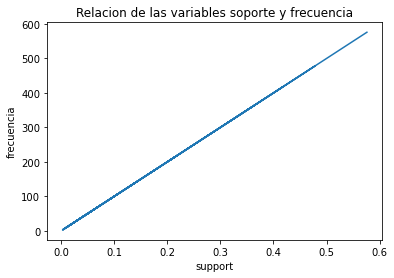

In [17]:
#Representacion grafica y coeficiente de pearson
plt.plot(aprio['support'], aprio['frecuencia'])
plt.xlabel('support')
plt.ylabel('frecuencia')
plt.title('Relacion de las variables soporte y frecuencia')
r = np.corrcoef(aprio['support'], aprio['frecuencia'])[1][0]
print('Coeficiente de pearson (r):',r)

Como podemos ver el coeficiente de pearson es aproximadamente 1, si tenemos en cuenta los datos de reading, writing y math por separado, pero en el caso de tener en cuenta todo el dataset podemos ver que es 1 por lo que son variables muy correlacionadas y viendo el plot podemos ver que efectivamente se trata de una linea recta.
Por lo tanto, no hay ninguna diferencia dado que si aumenta o disminuye el soporte tambien lo hara la frecuencia ,esto tiene sentido si se tiene encuenta que la frecuencia es : frecuencia= soporte/numero de transacciones.

## 1.3 ¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué? 

Desaparecen las reglas que no superan el soporte minimo, porque que no existen suficientes transacciones con dicha puntuacion.

## 1.4 Para una de las configuraciones, interpreta algunas de las reglas obtenidas que te hayan resultado curiosas.

In [18]:
#Buscamos la confianza con el mismo threshold que soporte de los datos totales
confianza = association_rules(aprio, metric="confidence", min_threshold=arraysoporte[0])

In [19]:
#Ordenamos los datos segun el valor de confidence de mayor a menor
confianza.sort_values(by=['confidence'],ascending=False, ignore_index=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baja_read),(baja_write),0.004,0.005,0.004,1.000000,200.000000,0.003980,inf
1,"(media_write, baja_math)",(media_read),0.005,0.093,0.005,1.000000,10.752688,0.004535,inf
2,"(baja_math, media_read)",(media_write),0.005,0.119,0.005,1.000000,8.403361,0.004405,inf
3,"(alta_write, media_math)",(alta_read),0.072,0.559,0.068,0.944444,1.689525,0.027752,7.938000
4,"(muyalta_math, muyalta_write)",(muyalta_read),0.200,0.344,0.188,0.940000,2.732558,0.119200,10.933333
...,...,...,...,...,...,...,...,...,...
141,(media_math),(baja_write),0.143,0.005,0.003,0.020979,4.195804,0.002285,1.016321
142,"(alta_write, alta_math)",(media_read),0.402,0.093,0.008,0.019900,0.213984,-0.029386,0.925416
143,(alta_write),"(alta_math, media_read)",0.548,0.031,0.008,0.014599,0.470921,-0.008988,0.983356
144,(alta_math),"(alta_write, media_read)",0.576,0.012,0.008,0.013889,1.157407,0.001088,1.001915


* Podemos ver que las reglas 1 y 2 tienen una confianza de uno, sin embargo una de ellas tiene un lift mucho mas alto que el otro, esto se debe a que la variable con el lift mas alto tiene menos soporte.
* Teniendo en cuenta lo anterior podemos sacar como conclusion que las reglas que tienen menos soporte son aquellas que tiene el lift mas alto.

## 1.4 Dadas las mejores configuraciones para cada tipo de puntuación. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los mejores y peores estudiantes?

Los valores de las columnas consequents son los valores que estamos mirando y entiendo como estudiantes malos aquellos que tienen notas bajas y como buenos aquellos que tienen notas altas y muy altas.

In [20]:
#Realizo una serie de transformaciones para mostrar el numero de individuos buenos y malos que hay
valuecounts=confianza.consequents.value_counts().to_frame()
valuecounts['categorias'] = valuecounts.index

In [21]:
valuecounts['categorias'] = valuecounts['categorias'].apply(str)

In [22]:
valuecounts[valuecounts['categorias'].str.contains("baja")].sum()

consequents                                                    8
categorias     frozenset({'baja_math'})frozenset({'baja_write...
dtype: object

In [23]:
valuecounts[valuecounts['categorias'].str.contains("alta")].sum()

consequents                                                  102
categorias     frozenset({'alta_read'})frozenset({'alta_math'...
dtype: object

Podemos ver que ha encontrado 8 estudiantes malos y 102 estudiantes buenos.
Para facilitar el entendimiento de este apartado indico a continuacion los rangos de clasificacion: 
'baja','media','alta','muyalta' que se han tenido en cuenta para la clasificacion.
(No todos se usaran en este apartado)

* READING

In [24]:
#Estudiantes malos
confianza[confianza['consequents'] == {'baja_read'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(baja_write),(baja_read),0.005,0.004,0.004,0.8,200.0,0.00398,4.98


In [25]:
#Estudiantes buenos
confianza[(confianza['consequents'] == {'alta_read'}) | (confianza['consequents'] == {'muyalta_read'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(alta_math),(alta_read),0.576,0.559,0.417,0.723958,1.295095,0.095016,1.597585
9,(alta_math),(muyalta_read),0.576,0.344,0.128,0.222222,0.645995,-0.070144,0.843429
12,(alta_write),(alta_read),0.548,0.559,0.478,0.872263,1.560399,0.171668,3.452400
15,(media_math),(alta_read),0.143,0.559,0.084,0.587413,1.050828,0.004063,1.068864
17,(media_write),(alta_read),0.119,0.559,0.039,0.327731,0.586281,-0.027521,0.655987
19,(muyalta_math),(alta_read),0.274,0.559,0.058,0.211679,0.378674,-0.095166,0.559417
21,(muyalta_write),(alta_read),0.328,0.559,0.042,0.128049,0.229068,-0.141352,0.505762
28,(alta_write),(muyalta_read),0.548,0.344,0.058,0.105839,0.307673,-0.130512,0.733649
44,(muyalta_math),(muyalta_read),0.274,0.344,0.216,0.788321,2.291631,0.121744,3.099034
49,(muyalta_write),(muyalta_read),0.328,0.344,0.286,0.871951,2.534742,0.173168,5.123048


* MATH

In [26]:
#Estudiantes malos
confianza[confianza['consequents'] == {'baja_math'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(media_read),(baja_math),0.093,0.007,0.005,0.053763,7.680492,0.004349,1.049420
32,(media_write),(baja_math),0.119,0.007,0.005,0.042017,6.002401,0.004167,1.036553
129,"(media_write, media_read)",(baja_math),0.080,0.007,0.005,0.062500,8.928571,0.004440,1.059200


In [27]:
#Estudiantes buenos
confianza[(confianza['consequents'] == {'alta_math'}) | (confianza['consequents'] == {'muyalta_math'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alta_read),(alta_math),0.559,0.576,0.417,0.745975,1.295095,0.095016,1.669127
2,(alta_write),(alta_math),0.548,0.576,0.402,0.733577,1.273571,0.086352,1.591452
5,(media_read),(alta_math),0.093,0.576,0.031,0.333333,0.578704,-0.022568,0.636000
6,(media_write),(alta_math),0.119,0.576,0.046,0.386555,0.671102,-0.022544,0.691178
8,(muyalta_read),(alta_math),0.344,0.576,0.128,0.372093,0.645995,-0.070144,0.675259
11,(muyalta_write),(alta_math),0.328,0.576,0.128,0.390244,0.677507,-0.060928,0.695360
18,(alta_read),(muyalta_math),0.559,0.274,0.058,0.103757,0.378674,-0.095166,0.810048
26,(alta_write),(muyalta_math),0.548,0.274,0.074,0.135036,0.492834,-0.076152,0.839342
45,(muyalta_read),(muyalta_math),0.344,0.274,0.216,0.627907,2.291631,0.121744,1.951125
47,(muyalta_write),(muyalta_math),0.328,0.274,0.200,0.609756,2.225387,0.110128,1.860375


* WRITING

In [28]:
#Estudiantes malos
confianza[confianza['consequents'] == {'baja_write'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,(baja_read),(baja_write),0.004,0.005,0.004,1.000000,200.000000,0.003980,inf
36,(media_math),(baja_write),0.143,0.005,0.003,0.020979,4.195804,0.002285,1.016321


In [29]:
#Estudiantes buenos
confianza[(confianza['consequents'] == {'alta_write'}) | (confianza['consequents'] == {'muyalta_write'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(alta_math),(alta_write),0.576,0.548,0.402,0.697917,1.273571,0.086352,1.496276
10,(alta_math),(muyalta_write),0.576,0.328,0.128,0.222222,0.677507,-0.060928,0.864000
13,(alta_read),(alta_write),0.559,0.548,0.478,0.855098,1.560399,0.171668,3.119358
20,(alta_read),(muyalta_write),0.559,0.328,0.042,0.075134,0.229068,-0.141352,0.726592
23,(media_math),(alta_write),0.143,0.548,0.072,0.503497,0.918789,-0.006364,0.910366
25,(media_read),(alta_write),0.093,0.548,0.012,0.129032,0.235460,-0.038964,0.518963
27,(muyalta_math),(alta_write),0.274,0.548,0.074,0.270073,0.492834,-0.076152,0.619240
29,(muyalta_read),(alta_write),0.344,0.548,0.058,0.168605,0.307673,-0.130512,0.543664
46,(muyalta_math),(muyalta_write),0.274,0.328,0.200,0.729927,2.225387,0.110128,2.488216
48,(muyalta_read),(muyalta_write),0.344,0.328,0.286,0.831395,2.534742,0.173168,3.985655


## 2.1 Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el soporte de los itemset. Por lo tanto, se tendrá que usar un método que dado un itemset devuelva su soporte.

In [30]:
#Añadimos la columna de la k
aprio['k']=aprio['itemsets'].apply(lambda x: len(x))

In [31]:
#Condicion para k=1
aprio[aprio['k']==1]

,support,itemsets,frecuencia,k
0,0.576,(alta_math),576.0,1
1,0.559,(alta_read),559.0,1
2,0.548,(alta_write),548.0,1
3,0.007,(baja_math),7.0,1
4,0.004,(baja_read),4.0,1
5,0.005,(baja_write),5.0,1
6,0.143,(media_math),143.0,1
7,0.093,(media_read),93.0,1
8,0.119,(media_write),119.0,1
9,0.274,(muyalta_math),274.0,1


## 2.2 A partir de k=2. Mostrar los itemset frecuentes candidatos y su soporte.

In [32]:
#Teniendo en cuenta que la frecuencia es el soporte entra el total de las transacciones añadimos una columna con este valor
aprio['frecuencia']=aprio['support']*len(data.index)

In [33]:
#Mostramos las transacciones con dicha longitud y ordenamos segun la frecuencia
aprio[aprio['k']==2].sort_values(by='frecuencia',ascending=False)

,support,itemsets,frecuencia,k
18,0.478,"(alta_write, alta_read)",478.0,2
12,0.417,"(alta_read, alta_math)",417.0,2
13,0.402,"(alta_write, alta_math)",402.0,2
36,0.286,"(muyalta_read, muyalta_write)",286.0,2
34,0.216,"(muyalta_math, muyalta_read)",216.0,2
35,0.200,"(muyalta_math, muyalta_write)",200.0,2
16,0.128,"(muyalta_read, alta_math)",128.0,2
17,0.128,"(alta_math, muyalta_write)",128.0,2
19,0.084,"(alta_read, media_math)",84.0,2
33,0.080,"(media_write, media_read)",80.0,2


## 2.3 Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

In [34]:
#Mostramos las transacciones hasta que no se generen items frecuentes
#Variamos el numero de k hasta que el dataframe sea empty
i=1
data=aprio[aprio['k']==i].sort_values(by='frecuencia',ascending=False)
data.empty
while (data.empty==False):
    i=i+1
    data=aprio[aprio['k']==i].sort_values(by='frecuencia',ascending=False)
    print('Para un valor de k: ',i)
    disp.display(data)

Para un valor de k:  2


,support,itemsets,frecuencia,k
18,0.478,"(alta_write, alta_read)",478.0,2
12,0.417,"(alta_read, alta_math)",417.0,2
13,0.402,"(alta_write, alta_math)",402.0,2
36,0.286,"(muyalta_read, muyalta_write)",286.0,2
34,0.216,"(muyalta_math, muyalta_read)",216.0,2
35,0.200,"(muyalta_math, muyalta_write)",200.0,2
16,0.128,"(muyalta_read, alta_math)",128.0,2
17,0.128,"(alta_math, muyalta_write)",128.0,2
19,0.084,"(alta_read, media_math)",84.0,2
33,0.080,"(media_write, media_read)",80.0,2


Para un valor de k:  3


,support,itemsets,frecuencia,k
37,0.364,"(alta_write, alta_read, alta_math)",364.0,3
52,0.188,"(muyalta_math, muyalta_read, muyalta_write)",188.0,3
43,0.098,"(muyalta_read, alta_math, muyalta_write)",98.0,3
44,0.068,"(alta_write, alta_read, media_math)",68.0,3
51,0.052,"(media_write, media_read, media_math)",52.0,3
45,0.046,"(alta_write, alta_read, muyalta_math)",46.0,3
39,0.030,"(alta_read, alta_math, muyalta_write)",30.0,3
41,0.030,"(alta_write, muyalta_read, alta_math)",30.0,3
49,0.028,"(alta_write, muyalta_math, muyalta_read)",28.0,3
38,0.023,"(alta_read, media_write, alta_math)",23.0,3


Para un valor de k:  4


,support,itemsets,frecuencia,k


In [35]:
data=aprio[aprio['k']==i].sort_values(by='frecuencia',ascending=False)
data

,support,itemsets,frecuencia,k


Podemos ver que para una longitud de 4 ya no se muestran items frecuentes

## 2.4 Mostrar todas las posibles reglas con la confianza de cada una de ellas.

In [36]:
confianza#Mostramos el dataframe previamente obtenido

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alta_read),(alta_math),0.559,0.576,0.417,0.745975,1.295095,0.095016,1.669127
1,(alta_math),(alta_read),0.576,0.559,0.417,0.723958,1.295095,0.095016,1.597585
2,(alta_write),(alta_math),0.548,0.576,0.402,0.733577,1.273571,0.086352,1.591452
3,(alta_math),(alta_write),0.576,0.548,0.402,0.697917,1.273571,0.086352,1.496276
4,(alta_math),(media_read),0.576,0.093,0.031,0.053819,0.578704,-0.022568,0.958591
...,...,...,...,...,...,...,...,...,...
141,"(muyalta_math, muyalta_write)",(muyalta_read),0.200,0.344,0.188,0.940000,2.732558,0.119200,10.933333
142,"(muyalta_read, muyalta_write)",(muyalta_math),0.286,0.274,0.188,0.657343,2.399061,0.109636,2.118735
143,(muyalta_math),"(muyalta_read, muyalta_write)",0.274,0.286,0.188,0.686131,2.399061,0.109636,2.274837
144,(muyalta_read),"(muyalta_math, muyalta_write)",0.344,0.200,0.188,0.546512,2.732558,0.119200,1.764103


## 2.5 Listar todas las reglas que sean de alta confianza.

Entendiendo por alta confianza una confianza proxima a uno como puede ser 0.7

In [37]:
confianza[confianza['confidence']>=0.7].sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,(baja_read),(baja_write),0.004,0.005,0.004,1.000000,200.000000,0.003980,inf
130,"(baja_math, media_read)",(media_write),0.005,0.119,0.005,1.000000,8.403361,0.004405,inf
128,"(media_write, baja_math)",(media_read),0.005,0.093,0.005,1.000000,10.752688,0.004535,inf
93,"(alta_write, media_math)",(alta_read),0.072,0.559,0.068,0.944444,1.689525,0.027752,7.938000
141,"(muyalta_math, muyalta_write)",(muyalta_read),0.200,0.344,0.188,0.940000,2.732558,0.119200,10.933333
136,"(media_read, media_math)",(media_write),0.057,0.119,0.052,0.912281,7.666224,0.045217,10.043400
51,"(alta_write, alta_math)",(alta_read),0.402,0.559,0.364,0.905473,1.619808,0.139282,4.665316
52,"(alta_read, alta_math)",(alta_write),0.417,0.548,0.364,0.872902,1.592886,0.135484,3.556302
12,(alta_write),(alta_read),0.548,0.559,0.478,0.872263,1.560399,0.171668,3.452400
49,(muyalta_write),(muyalta_read),0.328,0.344,0.286,0.871951,2.534742,0.173168,5.123048


## 2.6 Usar los siguientes métodos. Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor. Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

Dado un antecesor, en este caso muyalta_math

In [38]:
confianza[confianza['antecedents'] == {'muyalta_math'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(muyalta_math),(alta_read),0.274,0.559,0.058,0.211679,0.378674,-0.095166,0.559417
27,(muyalta_math),(alta_write),0.274,0.548,0.074,0.270073,0.492834,-0.076152,0.619240
44,(muyalta_math),(muyalta_read),0.274,0.344,0.216,0.788321,2.291631,0.121744,3.099034
46,(muyalta_math),(muyalta_write),0.274,0.328,0.200,0.729927,2.225387,0.110128,2.488216
103,(muyalta_math),"(alta_write, alta_read)",0.274,0.478,0.046,0.167883,0.351220,-0.084972,0.627316
115,(muyalta_math),"(alta_read, muyalta_write)",0.274,0.042,0.012,0.043796,1.042753,0.000492,1.001878
126,(muyalta_math),"(alta_write, muyalta_read)",0.274,0.058,0.028,0.102190,1.761893,0.012108,1.049220
143,(muyalta_math),"(muyalta_read, muyalta_write)",0.274,0.286,0.188,0.686131,2.399061,0.109636,2.274837


Dado un umbral minimo

Entendiendo por umbral minimo 0.3

In [39]:
confianza[confianza['confidence']>0.3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alta_read),(alta_math),0.559,0.576,0.417,0.745975,1.295095,0.095016,1.669127
1,(alta_math),(alta_read),0.576,0.559,0.417,0.723958,1.295095,0.095016,1.597585
2,(alta_write),(alta_math),0.548,0.576,0.402,0.733577,1.273571,0.086352,1.591452
3,(alta_math),(alta_write),0.576,0.548,0.402,0.697917,1.273571,0.086352,1.496276
5,(media_read),(alta_math),0.093,0.576,0.031,0.333333,0.578704,-0.022568,0.636000
...,...,...,...,...,...,...,...,...,...
141,"(muyalta_math, muyalta_write)",(muyalta_read),0.200,0.344,0.188,0.940000,2.732558,0.119200,10.933333
142,"(muyalta_read, muyalta_write)",(muyalta_math),0.286,0.274,0.188,0.657343,2.399061,0.109636,2.118735
143,(muyalta_math),"(muyalta_read, muyalta_write)",0.274,0.286,0.188,0.686131,2.399061,0.109636,2.274837
144,(muyalta_read),"(muyalta_math, muyalta_write)",0.344,0.200,0.188,0.546512,2.732558,0.119200,1.764103


## 2.7 Utiliza al menos dos representaciones gráficas para representar las reglas obtenidas e interpretar los datos.

Coeficiente de pearson (r): 1.0


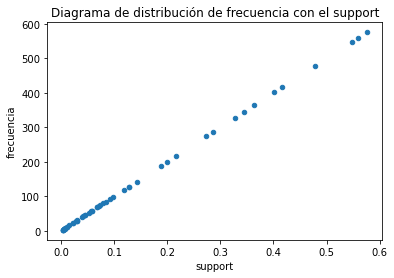

In [40]:
#Diagrama de distribucion de soporte y de la frecuencia
aprio.plot('support','frecuencia','scatter',title=('Diagrama de distribución de frecuencia con el support'))
r = np.corrcoef(aprio['support'], aprio['frecuencia'])[1][0]
print('Coeficiente de pearson (r):',r)

array([[<AxesSubplot:title={'center':'frecuencia'}>]], dtype=object)

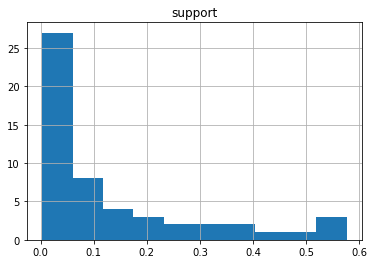

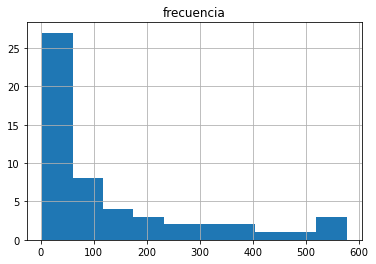

In [41]:
#Histograma para mostrar la distribucion de los datos de las variables y la frecuencia de estos datos.
aprio[["support"]].hist() 
aprio[["frecuencia"]].hist() #histograma

En estas dos representaciones podemos ver como la frecuencia tiene la misma distribucion que el support dado que la frecuencia es el soporte entre el numero de transacciones y como la correlacion entre estas dos variables es perfecta.

# Referencias
http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/